In [68]:
#importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [69]:
#Load the dataset from the csv file
df = pd.read_csv('creditcard.csv')

# Exploring the dataset:

In [70]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [71]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [72]:
#checking shape of the dataset
df.shape

(284807, 31)

In [73]:
#checking the datatype and null/non null distribution
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [75]:
#checking the class distribution of target variable
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Graphical representation

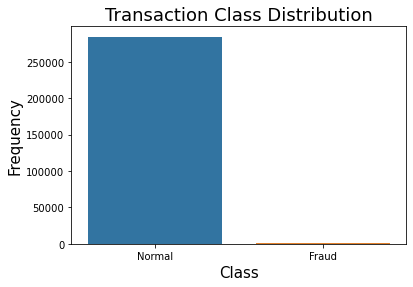

In [76]:
#countplot

sns.countplot(x = "Class", data = df) 
LABELS = ["Normal","Fraud"]
plt.title('Transaction Class Distribution',fontsize =18)
plt.xticks(range(2), LABELS) 
plt.xlabel("Class" , fontsize =15)
plt.ylabel("Frequency",fontsize = 15)
plt.show();

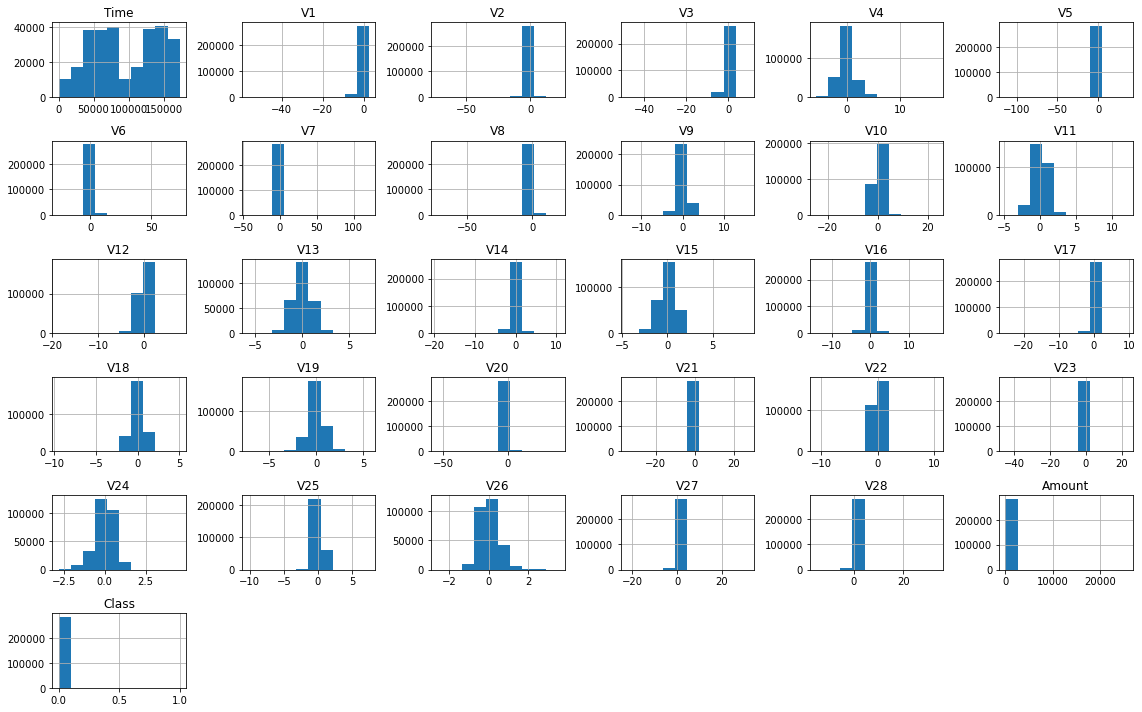

In [77]:
#plot histogram of each parameter
df.hist(figsize=(16,10)) 
plt.tight_layout() 
plt.show()

We can observe that, the given data is highly imbalanced

In [78]:
#checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


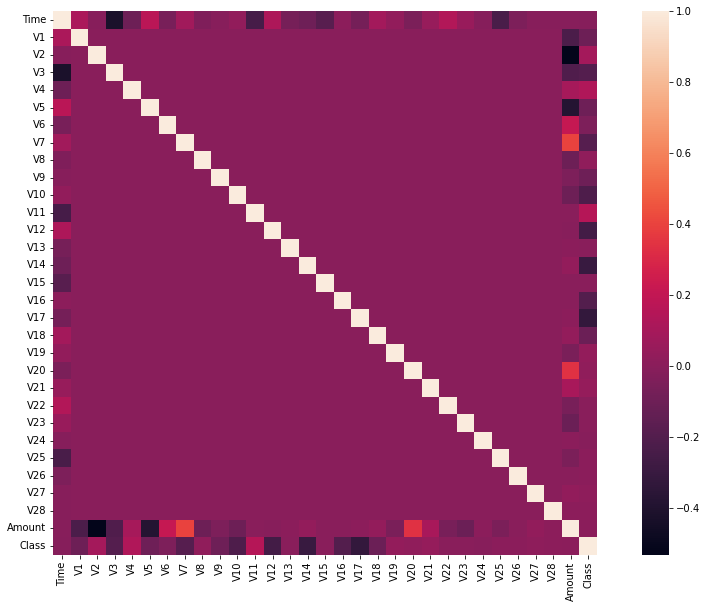

In [79]:
#Plotting heatmap
plt.figure(figsize = (16,10)) 
sns.heatmap(df.corr(),square=True) 
plt.show()

In [80]:
##To get the normal and fraud dataset

fraud = df[df['Class']==1]

valid = df[df['Class']== 0]

fraud_percentage = len(fraud)/float(len(valid))*100

In [81]:
print(fraud_percentage)
print('Fraud Cases :', len(fraud))
print('valid Cases :', len(valid))

0.17304750013189596
Fraud Cases : 492
valid Cases : 284315


In [82]:
#for the fraud class
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [83]:
#for the valid class
valid.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

While seeing the statistics, it is seen that the values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables. To reduce its wide range of values, we can normalize it using the ‘StandardScaler’ method in python.

In [84]:
sc = StandardScaler()
amount = df['Amount'].values
df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In [85]:
# DATA TRAINING

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


 # MODEL BUILDING:

DECISION TREE

In [87]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [88]:
# accuracy 
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_yhat)))

Accuracy score of the Decision Tree model is 0.9993960843796522


In [89]:
# f1-score
from sklearn.metrics import f1_score
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_yhat)))

F1 score of the Decision Tree model is 0.7922705314009663


In [90]:
# plot confusion_matrix
confusion_matrix(y_test, dt_yhat, labels = [0, 1])

array([[71077,    14],
       [   29,    82]], dtype=int64)

K-NEAREST NEIGHBOURS

In [92]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [93]:
# accuracy
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_yhat)))

Accuracy score of the K-Nearest Neighbors model is 0.9985393668717171


In [94]:
# f1-score
print('F1 score of the K-Nearest Neighbors model is {}'.format(f1_score(y_test, dt_yhat)))

F1 score of the K-Nearest Neighbors model is 0.7922705314009663


In [95]:
# plot confusion_matrix
confusion_matrix(y_test, knn_yhat, labels = [0, 1])

array([[71091,     0],
       [  104,     7]], dtype=int64)

 LOGISTIC REGRESSION 

In [97]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

C:\Users\shash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
#accuracy
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)))

Accuracy score of the Logistic Regression model is 0.9989326142524086


In [99]:
#f1-score
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))

F1 score of the Logistic Regression model is 0.6545454545454545


In [100]:
# plot confusion_matrix
confusion_matrix(y_test, lr_yhat, labels = [0, 1])

array([[71054,    37],
       [   39,    72]], dtype=int64)

SUPPORT VECTOR MACHINES 

In [102]:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [103]:
#accuracy
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test, svm_yhat)))

Accuracy score of the Support Vector Machines model is 0.9984410550265442


In [104]:
#f1-score
print('F1 score of the Support Vector Machines model is {}'.format(f1_score(y_test, svm_yhat)))

F1 score of the Support Vector Machines model is 0.0


In [105]:
# plot confusion_matrix
confusion_matrix(y_test, svm_yhat, labels = [0, 1])

array([[71091,     0],
       [  111,     0]], dtype=int64)

RANDOM FOREST 

In [107]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [108]:
#accuracy
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy score of the Random Forest model is 0.9993118170837898


In [109]:
#f1-score
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test, rf_yhat)))

F1 score of the Random Forest model is 0.7461139896373058


In [110]:
# plot confusion_matrix
confusion_matrix(y_test, rf_yhat, labels = [0, 1])

array([[71081,    10],
       [   39,    72]], dtype=int64)

XG BOOST 

In [112]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

C:\Users\shash\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:10] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [113]:
#accuracy
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)))

Accuracy score of the XGBoost model is 0.9995786635206876


In [114]:
#f1-score
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))

F1 score of the XGBoost model is 0.8484848484848485


In [115]:
# plot confusion_matrix
confusion_matrix(y_test, xgb_yhat, labels = [0, 1])

array([[71088,     3],
       [   27,    84]], dtype=int64)

# Evaluation:

ACCURACY(s):

In [117]:
print('accuracy',round(accuracy_score(y_test,dt_yhat)*100,4),'%,decision_tree')
print('accuracy',round(accuracy_score(y_test,knn_yhat)*100,4),'%,k-nearest neighbors')
print('accuracy',round(accuracy_score(y_test,lr_yhat)*100,4),'%,logistic regression')
print('accuracy',round(accuracy_score(y_test,svm_yhat)*100,4),'%,support vector machine')
print('accuracy',round(accuracy_score(y_test,rf_yhat)*100,4),'%,random_forest')
print('accuracy',round(accuracy_score(y_test,xgb_yhat)*100,4),'%,xg-boost')

accuracy 99.9396 %,decision_tree
accuracy 99.8539 %,k-nearest neighbors
accuracy 99.8933 %,logistic regression
accuracy 99.8441 %,support vector machine
accuracy 99.9312 %,random_forest
accuracy 99.9579 %,xg-boost


CONFUSION MATRICES:

In [118]:
print('confusion matrix\n',confusion_matrix(y_test,dt_yhat),'decision_tree')
print('confusion matrix\n',confusion_matrix(y_test,knn_yhat),'k-nearest neighbors')
print('confusion matrix\n',confusion_matrix(y_test,lr_yhat),'logistic regression')
print('confusion matrix\n',confusion_matrix(y_test,svm_yhat),'support vector machine')
print('confusion matrix\n',confusion_matrix(y_test,rf_yhat),'random_forest')
print('confusion matrix\n',confusion_matrix(y_test,xgb_yhat),'xg-boost')

confusion matrix
 [[71077    14]
 [   29    82]] decision_tree
confusion matrix
 [[71091     0]
 [  104     7]] k-nearest neighbors
confusion matrix
 [[71054    37]
 [   39    72]] logistic regression
confusion matrix
 [[71091     0]
 [  111     0]] support vector machine
confusion matrix
 [[71081    10]
 [   39    72]] random_forest
confusion matrix
 [[71088     3]
 [   27    84]] xg-boost


# CONCLUSION:

We have received 99.95% accuracy in XG-BOOST in our credit card fraud detection. This number should not be surprising as our data was balanced towards one class. The good thing that we have noticed from the confusion matrix is that — our model is not overfitted.

Finally, based on our accuracy score — XGBoost is the winner for our case.